# NLP (HW1)
## Persian Gender Recognition
## Authors: Nahal Mirzaie, Tahere Talaie
### Spring 1400

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive


### Clone Project from Github

In [1]:
!git clone 'https://github.com/mirzanahal/Persian-Gender-Recognition'

Cloning into 'Persian-Gender-Recognition'...
remote: Enumerating objects: 2180, done.
remote: Counting objects: 100% (2180/2180), done.
remote: Compressing objects: 100% (2098/2098), done.
remote: Total 2180 (delta 110), reused 2115 (delta 55), pack-reused 0
Receiving objects: 100% (2180/2180), 30.24 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (110/110), done.


### Install Requirement

In [2]:
!pip install -r Persian-Gender-Recognition/requirement.txt

     |████████████████████████████████| 184kB 13.4MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 317kB 51.0MB/s 
     |████████████████████████████████| 122kB 43.8MB/s 
     |████████████████████████████████| 788kB 53.2MB/s 
     |████████████████████████████████| 122kB 46.8MB/s 
     |████████████████████████████████| 235kB 46.8MB/s 
     |████████████████████████████████| 10.3MB 45.6MB/s 
     |████████████████████████████████| 1.4MB 52.0MB/s 
     |████████████████████████████████| 15.3MB 250kB/s 
     |████████████████████████████████| 9.9MB 202kB/s 
     |████████████████████████████████| 2.2MB 40.0MB/s 
     |████████████████████████████████| 368kB 38.5MB/s 
     |████████████████████████████████| 993kB 41.0MB/s 
     |████████████████████████████████| 512kB 43.2MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
     |████████████████████████████████| 27.4MB 163kB

### Set Directory

In [3]:
%cd Persian-Gender-Recognition/code

/content/Persian-Gender-Recognition/code


## Import 

In [4]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from os.path import isfile

import config
import utils
import data_path
import data_loader

from classifier import Classifier
from feature_generator import generate_features

## Load Datasets

In [7]:
embedding_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'embedding_fasttext.csv'), index_col=0)
print(embedding_features.head())

         F0        F1        F2        F3  ...      F298      F299  number  label
0 -0.016724  0.017616  0.009455 -0.013369  ... -0.015635  0.018951     289      0
1 -0.058125  0.009000  0.011841 -0.012871  ... -0.028773  0.014173     504      0
2  0.000008  0.030201 -0.010074 -0.028357  ...  0.001973 -0.019890     262      0
3  0.023368  0.074310  0.004460 -0.041999  ... -0.010022 -0.024235     276      0
4 -0.014248  0.029315  0.000213 -0.018357  ... -0.008050 -0.025579     510      0

[5 rows x 302 columns]


In [8]:
psychological_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'psychological_features.csv'), index_col=0)
print(psychological_features.head())

   PSY_F36  PSY_F37  PSY_F38  PSY_F39  PSY_F47  PSY_F48  number  label
0       25       16        0        0        0        0     289      0
1        2        5        0        1        0        2     504      0
2       19       16        0        0        0        0     262      0
3        7        9        0        0        0        0     276      0
4       33       44        0        4        0        0     510      0


In [9]:
structural_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'structural_features.csv'), index_col=0)
print(structural_features.head())

   STR_F25  STR_F26  STR_F27  STR_F28  STR_F29  number  label
0        1        1     55.0      0.0    122.5     289      0
1        0        1     18.0      0.0     92.0     504      0
2        1        1     53.0      0.0    117.5     262      0
3        0        1     20.0      0.0     80.0     276      0
4        1       10     14.3      0.0    276.5     510      0


In [10]:
syntactics_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'syntactics_features.csv'), index_col=0)
print(syntactics_features.head())

   SYN_F18   SYN_F19  SYN_F20  SYN_F21  ...   SYN_F23   SYN_F24  number  label
0      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     289      0
1      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     504      0
2      0.0  0.000000      0.0      0.0  ...  0.012766  0.004255     262      0
3      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     276      0
4      0.0  0.018083      0.0      0.0  ...  0.000000  0.000000     510      0

[5 rows x 9 columns]


In [11]:
text_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'text_dependent_features.csv'), index_col=0)
print(text_dependent_features.head())

   TD_F1     TD_F2  TD_F49  TD_F3     TD_F4  TD_F5     TD_F6  number  label
0    245  0.102041      25      1  0.179592    0.0  0.012245     289      0
1     92  0.217391      20      2  0.163043    0.0  0.000000     504      0
2    235  0.110638      26      3  0.195745    0.0  0.012766     262      0
3     80  0.250000      20      1  0.212500    0.0  0.000000     276      0
4    553  0.048825      27     16  0.249548    0.0  0.018083     510      0


In [12]:
word_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'train', 'word_dependent_features.csv'), index_col=0)
print(word_dependent_features.head())

   WD_F7     WD_F8     WD_F9    WD_F10  ...       WD_F17    WD_F50  number  label
0     55  4.454545  0.763636  0.600000  ...  1870.088820  3.635431     289      0
1     18  5.111111  0.888889  0.611111  ...  2312.297406  2.736339     504      0
2     53  4.433962  0.830189  0.660377  ...  2495.612060  3.715138     262      0
3     20  4.000000  0.950000  0.800000  ...  5691.891320  2.926418     276      0
4    143  3.867133  0.601399  0.608392  ...  2134.023191  4.147394     510      0

[5 rows x 14 columns]


## Generate Features

In [13]:
features_list = [embedding_features, psychological_features, structural_features, syntactics_features, text_dependent_features, word_dependent_features]

features = features_list.pop()
for feature in features_list:
  features = pd.merge(features, feature, left_on=['label', 'number'], right_on=['label', 'number'])

print(features.head())
print(features.shape)

   WD_F7     WD_F8     WD_F9    WD_F10  ...  TD_F3     TD_F4  TD_F5     TD_F6
0     55  4.454545  0.763636  0.600000  ...      1  0.179592    0.0  0.012245
1     18  5.111111  0.888889  0.611111  ...      2  0.163043    0.0  0.000000
2     53  4.433962  0.830189  0.660377  ...      3  0.195745    0.0  0.012766
3     20  4.000000  0.950000  0.800000  ...      1  0.212500    0.0  0.000000
4    143  3.867133  0.601399  0.608392  ...     16  0.249548    0.0  0.018083

[5 rows x 339 columns]
(2000, 339)


## Split X, y 

In [100]:
y = features['label']
X = features.drop(['label', 'number'], axis=1)

## Normalize

In [101]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Feature Importance

In [103]:
classifier = Classifier('Random Forest', n_estimator=300)
classifier.fit(X, y)
feature_importance = classifier.model.feature_importances_

In [73]:
pip install matplotlib==3.1.3

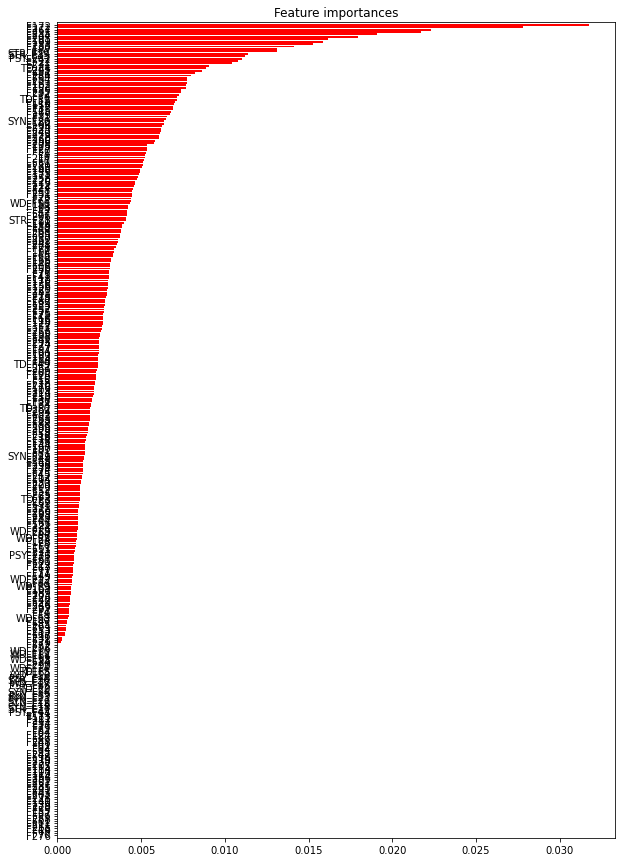

In [104]:
utils.plot_feature_importance(feature_importance, X)

In [105]:
selected_features = feature_importance > 0.005

In [106]:
X = X.T[selected_features].T
print(X.shape)
print(X.columns)

(2000, 60)
Index(['F0', 'F1', 'F6', 'F22', 'F23', 'F31', 'F35', 'F37', 'F39', 'F50',
       'F51', 'F54', 'F56', 'F74', 'F102', 'F110', 'F115', 'F127', 'F130',
       'F153', 'F158', 'F160', 'F162', 'F163', 'F172', 'F175', 'F180', 'F181',
       'F187', 'F188', 'F196', 'F199', 'F205', 'F207', 'F208', 'F217', 'F228',
       'F231', 'F235', 'F236', 'F240', 'F242', 'F244', 'F245', 'F255', 'F267',
       'F271', 'F273', 'F280', 'F283', 'F284', 'F291', 'F292', 'F294',
       'PSY_F37', 'STR_F25', 'STR_F29', 'SYN_F20', 'TD_F1', 'TD_F4'],
      dtype='object')


## Classification

### We decide to use SVM as our final model due to better performance and less variation.

In [107]:
classifier = Classifier('Random Forest', n_estimator=300, max_depth=10)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.623656 | 0.666667 | 0.586538 | 0.547368 | 0.655556 | 0.642857 | 0.61     | 0.584906 | 0.580952 | 0.694737 | 0.619324 |
| recall    | 0.574257 | 0.686869 | 0.592233 | 0.611765 | 0.572816 | 0.567568 | 0.642105 | 0.659574 | 0.701149 | 0.589286 | 0.619762 |
| f1        | 0.597938 | 0.676617 | 0.589372 | 0.577778 | 0.611399 | 0.602871 | 0.625641 | 0.62     | 0.635417 | 0.637681 | 0.617471 |
| accuracy  | 0.61     | 0.675    | 0.575    | 0.62     | 0.625    | 0.585    | 0.635    | 0.62     | 0.65     | 0.625    | 0.622    |


In [108]:
classifier = Classifier('SVM' , kernel='rbf', gamma='scale')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.633333 | 0.659574 | 0.608247 | 0.5      | 0.643564 | 0.653061 | 0.618557 | 0.592593 | 0.548077 | 0.690722 | 0.614773 |
| recall    | 0.564356 | 0.626263 | 0.572816 | 0.529412 | 0.631068 | 0.576577 | 0.631579 | 0.680851 | 0.655172 | 0.598214 | 0.606631 |
| f1        | 0.596859 | 0.642487 | 0.59     | 0.514286 | 0.637255 | 0.61244  | 0.625    | 0.633663 | 0.596859 | 0.641148 | 0.609    |
| accuracy  | 0.615    | 0.655    | 0.59     | 0.575    | 0.63     | 0.595    | 0.64     | 0.63     | 0.615    | 0.625    | 0.617    |


In [109]:
classifier = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(32,4,), activation='relu', solver='adam')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.555556 | 0.612903 | 0.613636 | 0.5      | 0.62766  | 0.663551 | 0.590909 | 0.565657 | 0.516484 | 0.618557 | 0.586491 |
| recall    | 0.544554 | 0.575758 | 0.524272 | 0.670588 | 0.572816 | 0.63964  | 0.547368 | 0.595745 | 0.54023  | 0.535714 | 0.574668 |
| f1        | 0.55     | 0.59375  | 0.565445 | 0.572864 | 0.598985 | 0.651376 | 0.568306 | 0.580311 | 0.52809  | 0.574163 | 0.578329 |
| accuracy  | 0.55     | 0.61     | 0.585    | 0.575    | 0.605    | 0.62     | 0.605    | 0.595    | 0.58     | 0.555    | 0.588    |


In [110]:
classifier = Classifier('Naive Bayes')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.615385 | 0.661017 | 0.531915 | 0.391304 | 0.728814 | 0.677419 | 0.603774 | 0.583333 | 0.40678  | 0.648148 | 0.584789 |
| recall    | 0.39604  | 0.393939 | 0.242718 | 0.211765 | 0.417476 | 0.378378 | 0.336842 | 0.446809 | 0.275862 | 0.3125   | 0.341233 |
| f1        | 0.481928 | 0.493671 | 0.333333 | 0.274809 | 0.530864 | 0.485549 | 0.432432 | 0.506024 | 0.328767 | 0.421687 | 0.428906 |
| accuracy  | 0.57     | 0.6      | 0.5      | 0.525    | 0.62     | 0.555    | 0.58     | 0.59     | 0.51     | 0.52     | 0.557    |


In [111]:
classifier = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.627907 | 0.650485 | 0.596154 | 0.576471 | 0.601942 | 0.616071 | 0.568627 | 0.564356 | 0.536842 | 0.673684 | 0.601254 |
| recall    | 0.534653 | 0.676768 | 0.601942 | 0.576471 | 0.601942 | 0.621622 | 0.610526 | 0.606383 | 0.586207 | 0.571429 | 0.598794 |
| f1        | 0.57754  | 0.663366 | 0.599034 | 0.576471 | 0.601942 | 0.618834 | 0.588832 | 0.584615 | 0.56044  | 0.618357 | 0.598943 |
| accuracy  | 0.605    | 0.66     | 0.585    | 0.64     | 0.59     | 0.575    | 0.595    | 0.595    | 0.6      | 0.605    | 0.605    |


## Split Train and Test

## Explorary Idea: Use ensenble idea on all sklearn models and suggest label with maximum occurance.

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

In [113]:
svm = Classifier('SVM' , kernel='rbf', gamma='auto', probability=True)
train_predictions_svm = svm.fit(X_train, y_train)

In [114]:
rf = Classifier('Random Forest', n_estimator=200, max_depth=10)
train_predictions_rf = rf.fit(X_train, y_train)

In [115]:
mlp = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(32, 4,), activation='relu', solver='adam')
train_predictions_mlp = mlp.fit(X_train, y_train)

In [116]:
adaboost = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
train_predictions_adaboost = adaboost.fit(X_train, y_train)

In [117]:
nb = Classifier('Naive Bayes')
train_predictions_nb = nb.fit(X_train, y_train)

In [118]:
threshold = 0.5

train_prediction_labels_svm = np.array(train_predictions_svm[:,1] > threshold, dtype=int)
train_prediction_labels_rf = np.array(train_predictions_rf[:,1] > threshold, dtype=int)
train_prediction_labels_mlp = np.array(train_predictions_mlp[:,1] > threshold, dtype=int)
train_prediction_labels_ad = np.array(train_predictions_adaboost[:,1] > threshold, dtype=int)
train_prediction_labels_nb = np.array(train_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(train_prediction_labels_svm)):
    lsts.append(
        [
            train_prediction_labels_svm[i],
            train_prediction_labels_rf[i],
            train_prediction_labels_mlp[i],
            train_prediction_labels_ad[i],
            train_prediction_labels_nb[i]
        ]
    )

y_train_pred = [ max(lst, key=lst.count) for lst in lsts]

In [119]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       818
           1       0.95      0.81      0.88       782

    accuracy                           0.89      1600
   macro avg       0.90      0.89      0.89      1600
weighted avg       0.90      0.89      0.89      1600

0.888125


In [120]:
test_predictions_svm = rf.predict(X_test)
test_predictions_rf = svm.predict(X_test)
test_predictions_ad = adaboost.predict(X_test)
test_predictions_nb = nb.predict(X_test)
test_predictions_mlp = mlp.predict(X_test)

test_prediction_labels_svm = np.array(test_predictions_svm[:,1] > threshold, dtype=int)
test_prediction_labels_rf = np.array(test_predictions_rf[:,1] > threshold, dtype=int)
test_prediction_labels_mlp = np.array(test_predictions_mlp[:,1] > threshold, dtype=int)
test_prediction_labels_ad = np.array(test_predictions_ad[:,1] > threshold, dtype=int)
test_prediction_labels_nb = np.array(test_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(test_prediction_labels_svm)):
    lsts.append(
        [
            test_prediction_labels_svm[i],
            test_prediction_labels_rf[i],
            test_prediction_labels_mlp[i],
            test_prediction_labels_ad[i],
            test_prediction_labels_nb[i]
        ]
    )

y_test_pred = [ max(lst, key=lst.count) for lst in lsts]

In [121]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62       182
           1       0.68      0.52      0.59       218

    accuracy                           0.61       400
   macro avg       0.62      0.62      0.61       400
weighted avg       0.62      0.61      0.61       400

0.6075
